# NOVEL CORONAVIRUS FORECAST

Amid the outbreak of COVID-19, it is a critical need to analyze and forecast the progress of the pandemic and the effective of current policy. An important task is to predict the number of confirmed cases and fatalities globally, and in each country in order to have appropriate preparation and policy. Many data scientist are trying to use AI to forecast these numbers by studying mass social interaction, analyzing patients travel records, and clustering high risk areas.

In the context of this notebook, because of limited resource and data, I will only conduct Exploratory Data Analysis and use basic log-linear and logistics function model to predict the number of cases.

The dataset is acquired from John Hopkins University and can be downloaded from this link:
https://covidresearch.ai/datasets/dataset?id=1

The method I use for modelling is inspired from this Kaggle notebook: https://www.kaggle.com/saga21/covid-global-forecast-sir-model-ml-regressions

## General Outline

1. Import library and data
2. Exploratory Data Analysis
3. Implement and fit SIR model to real data
4. Use log-linear function to forecast the progress of pandemic in the early stage
5. Use logistic function to anaylize the progress of pandemic

## 1. Import library and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate, optimize
from sklearn import linear_model
pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings('ignore')

In this notebook, I use time series data for confirmed cases and death cases globally, which can be imported from these two .csv files:
* "time_series_covid19_confirmed_global.csv"
* "time_series_covid19_deaths_global.csv"

In [2]:
confirmed_global = pd.read_csv('data/time_series_covid19_confirmed_global.csv')
death_global = pd.read_csv('data/time_series_covid19_deaths_global.csv')

In [3]:
confirmed_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26


In [4]:
death_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


The .csv file contain the first 4 columns: "Province/State", "Country/Region", "Lat", "Long":
* "Province/State": for China, the numbers are measured in scale of province
* "Lat" and "Long" is the lattitude and longitude of the region
The fifth columns onward are number of confirmed or death cases, counting from 01/22/2020

## 2. Exploratory Data Analysis

I am going to process the DataFrame to get confirmed and death cases by each country. For countries with multiples provinces, I will take the sum of all regions for each day, and put all into a new DataFrame.    

With the new DataFrame, I can plot the number of confirmed and deceased cases for each country, to visualize the progress of the virus

In [5]:
def get_cases_by_country(country):
    if country != "Global":
        cases_rows = confirmed_global.loc[confirmed_global['Country/Region'] == country]
        death_rows = death_global.loc[confirmed_global['Country/Region'] == country]
    else:
        cases_rows = confirmed_global
        death_rows = death_global
    cases = {'Confirmed': {date: sum(cases_rows[date]) for date in cases_rows.columns[4:]},
             'Fatalities': {date: sum(death_rows[date]) for date in death_rows.columns[4:]}}
    df_cases = pd.DataFrame(cases,index=cases['Confirmed'].keys())
    return df_cases

In [6]:
def plot_cases_by_country(country):
    df_cases = get_cases_by_country(country)    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    df_cases.plot(ax=ax1)
    ax1.set_title(country + " confirmed cases", size=13)
    ax1.set_ylabel("Number of cases", size=13)
    ax1.set_xlabel("Date", size=13)
    df_cases['Fatalities'].plot(ax=ax2, color='orange')
    ax2.set_title(country + " deceased cases", size=13)
    ax2.set_ylabel("Number of cases", size=13)
    ax2.set_xlabel("Date", size=13)
    fig.show()

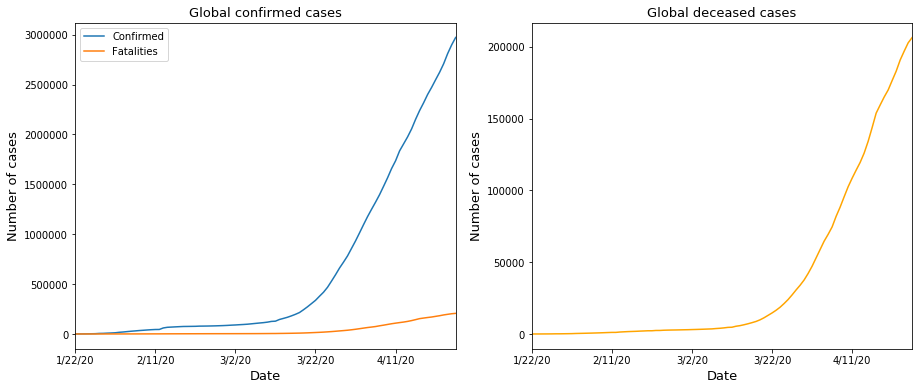

In [7]:
plot_cases_by_country("Global")

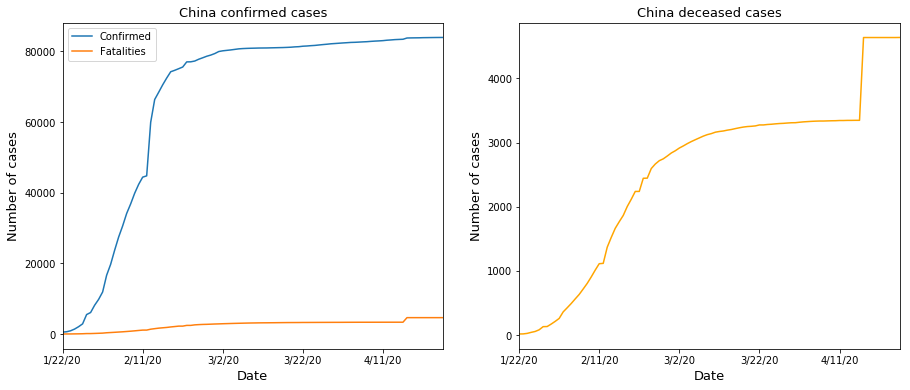

In [8]:
plot_cases_by_country("China")

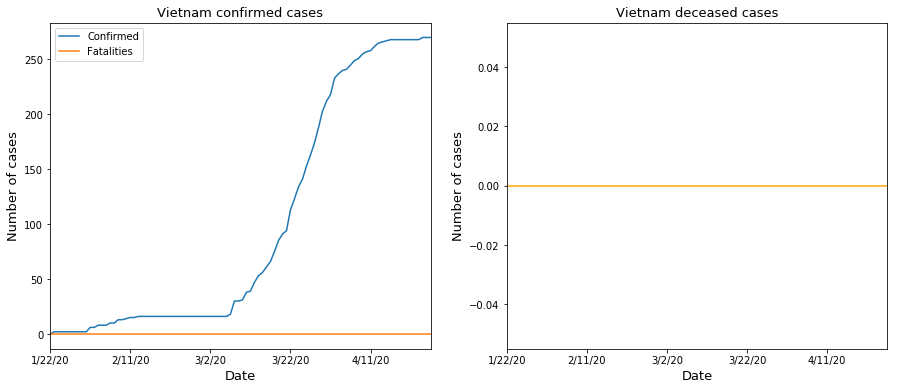

In [9]:
plot_cases_by_country('Vietnam')

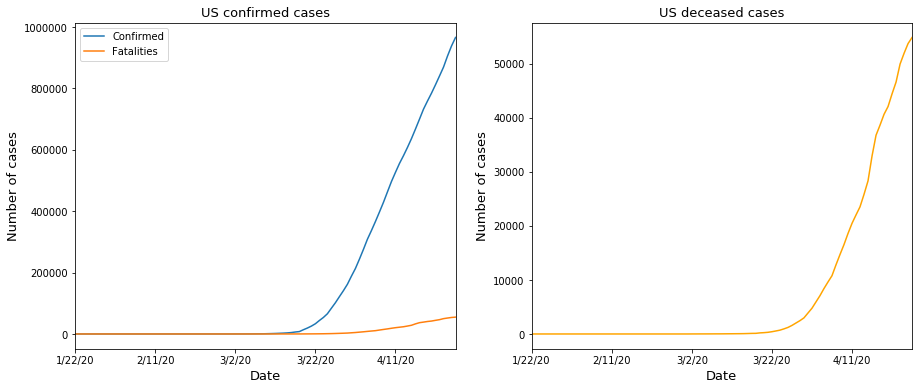

In [10]:
plot_cases_by_country('US')

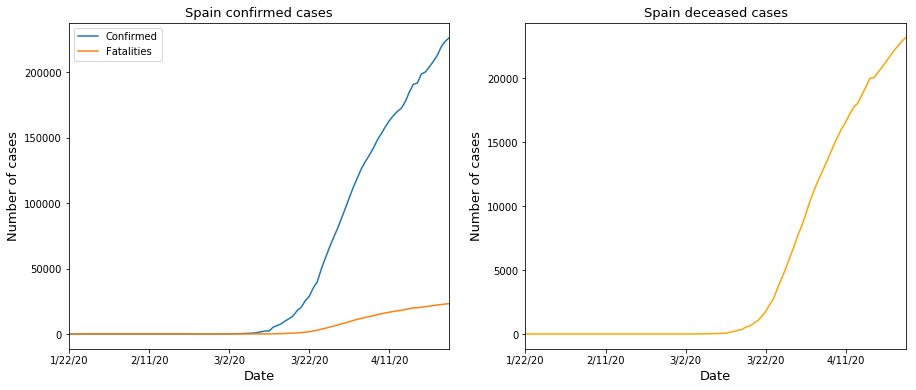

In [11]:
plot_cases_by_country('Spain')

Looking at the above plots, we can see the growing number of confirmed cases, globally and in each country. From there we can also spot some abnormal points. For example, in China, there is a straight up rise after April 11th in the deceased cases by about nearly 2000, that was when they released a new number due to wrong statistics method. Confirmed and deceased cases in "Global" and US are rather "smooth", but have shown no sign of slowing down. We now use some models to forecast the progress and see when the curve is flatten.

## 3. Implement and fit SIR model

SIR model is widely used to analyze the progress of transmitted diseases, and this COVID-19 should also be well fitted using the model. SIR is a simple model that monitor a population in 3 states:
* **Susceptible (S)**: The individual has not contracted the disease, but might be infected due to transmission from infected people
* **Infected (I)**: The person has contracted the disease
* **Recovered/Deceased (R)**: The person who had been infected but has either recovered or deceased.


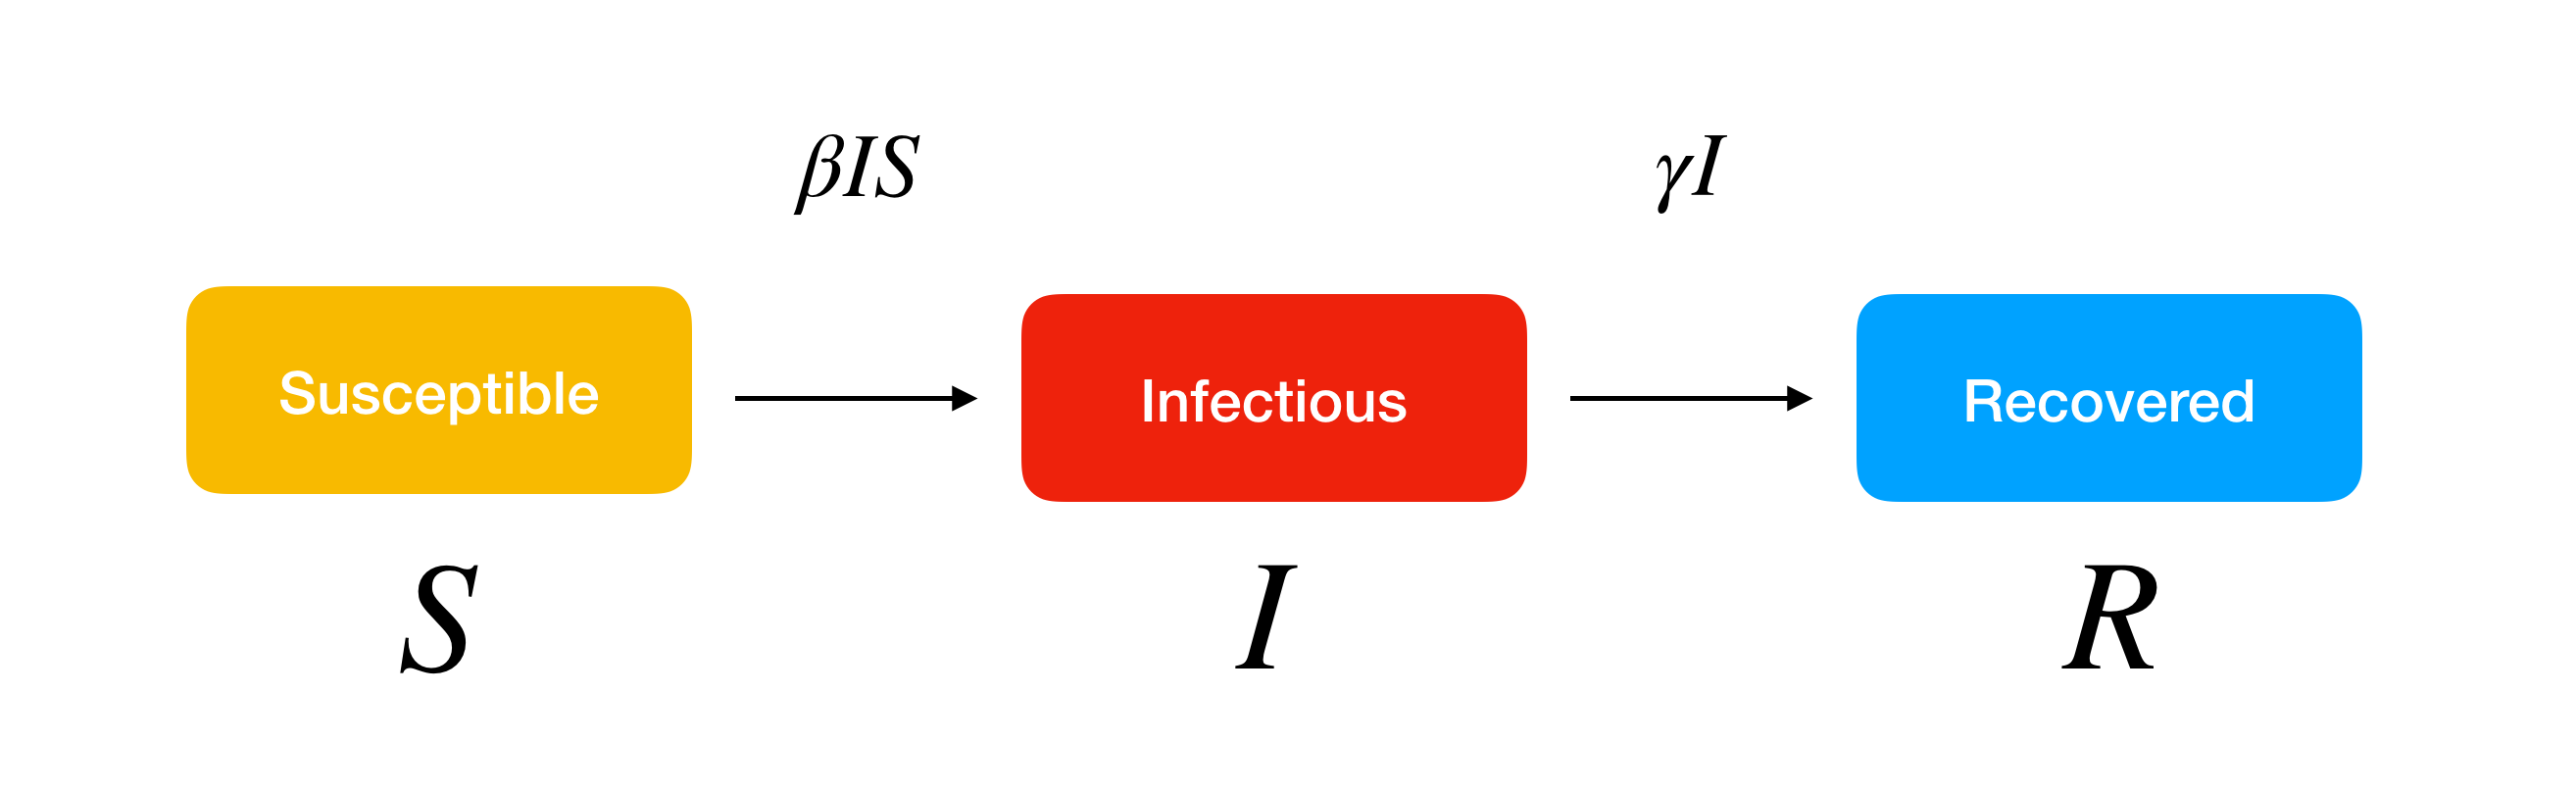

*Image by Kai Sasaki from [lewuathe.com](https://lewuathe.com/)*

I will use the most basic version of SIR model, which can be expressed by these differential equations:

$$\frac{dS}{dT} = -\frac{\beta IS}{N}$$

$$\frac{dI}{dT} = \frac{\beta IS}{N}-\gamma I$$

$$\frac{dR}{dT} = \gamma I$$

With $\beta$ the transmission rate and $\gamma$ the recovery rate and N is the total size of the populations

SIR model can be implemented in many ways. We will simply run a numerical method [Runge-Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) to solve the differential equations system. The functions governing the differential equations are:

In [12]:
# Susceptible equation
def fS(N, S, I, beta):
    fS = -beta*S*I/N
    return fS

# Infected equation
def fI(N, S, I, beta, gamma):
    fI = beta*S*I/N - gamma*I
    return fI

# Recovered/deceased equation
def fR(N, I, gamma):
    fR = gamma*I
    return fR

In [13]:
def rK4(N, S, I, R, fS, fI, fR, beta, gamma, hs):
    S1 = fS(N, S, I, beta)*hs
    I1 = fI(N, S, I, beta, gamma)*hs
    R1 = fR(N, I, gamma)*hs
    Sk = S + S1*0.5
    Ik = I + I1*0.5
    Rk = R + R1*0.5
    S2 = fS(N, Sk, Ik, beta)*hs
    I2 = fI(N, Sk, Ik, beta, gamma)*hs
    R2 = fR(N, Ik, gamma)*hs
    Sk = S + S2*0.5
    Ik = I + I2*0.5
    Rk = R + R2*0.5
    S3 = fS(N, Sk, Ik, beta)*hs
    I3 = fI(N, Sk, Ik, beta, gamma)*hs
    R3 = fR(N, Ik, gamma)*hs
    Sk = S + S3
    Ik = I + I3
    Rk = R + R3
    S4 = fS(N, Sk, Ik, beta)*hs
    I4 = fI(N, Sk, Ik, beta, gamma)*hs
    R4 = fR(N, Ik, gamma)*hs
    S = S + (S1 + 2*S2 + 2*S3 + S4)/6
    I = I + (I1 + 2*I2 + 2*I3 + I4)/6
    R = R + (R1 + 2*R2 + 2*R3 + R4)/6
    return S, I, R

In [14]:
def SIR(N, I0, beta, gamma, hs):
    
    """
    N = total number of population
    beta = transition rate S->I
    gamma = transition rate I->R
    k =  denotes the constant degree distribution of the network (average value for networks in which 
    the probability of finding a node with a different connectivity decays exponentially fast
    hs = jump step of the numerical integration
    """
    
    # Initial condition
    S = float(N-1) - I0
    I = float(1) + I0
    R = 0.

    sus, inf, rec= [],[],[]
    for i in range(10000): # Run for a certain number of time-steps
        sus.append(S)
        inf.append(I)
        rec.append(R)
        S,I,R = rK4(N, S, I, R, fS, fI, fR, beta, gamma, hs)

    return sus, inf, rec

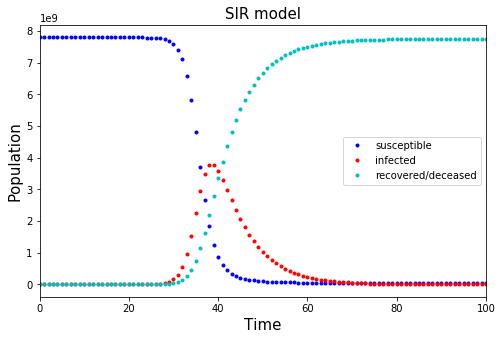

In [15]:
N = 7800*(10**6)
b0 = 0
beta = 0.78735
gamma = 0.154
hs = 1

sus, inf, rec = SIR(N, b0, beta, gamma, hs)

f = plt.figure(figsize=(8,5)) 
plt.plot(sus, 'b.', label='susceptible');
plt.plot(inf, 'r.', label='infected');
plt.plot(rec, 'c.', label='recovered/deceased');
plt.title("SIR model", fontsize=15)
plt.xlabel("Time", fontsize=15);
plt.ylabel("Population", fontsize=15);
plt.legend(loc='best')
plt.xlim(0,100)
plt.show()

Now I will apply SIR model to real data acquired above

In [16]:
def plot_SIR_country(country,population):
    df_cases = get_cases_by_country(country).diff().fillna(0)
    ydata = df_cases['Confirmed'][10:]
    xdata = [i for i in range(1,len(ydata)+1)]
    ydata = np.array(ydata, dtype=float)
    xdata = np.array(xdata, dtype=float)
    
    N = population
    inf0 = ydata[0]
    sus0 = N - inf0
    rec0 = 0.0

    def sir_model(y, x, beta, gamma):
        sus = -beta * y[0] * y[1] / N
        rec = gamma * y[1]
        inf = -(sus + rec)
        return sus, inf, rec

    def fit_odeint(x, beta, gamma):
        return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

    popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
    fitted = fit_odeint(xdata, *popt)
    plt.plot(xdata, ydata, 'o')
    plt.plot(xdata, fitted)
    plt.title("Fit of SIR model for infected cases in " + country)
    plt.ylabel("Population infected")
    plt.xlabel("Days")
    plt.show()
    print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

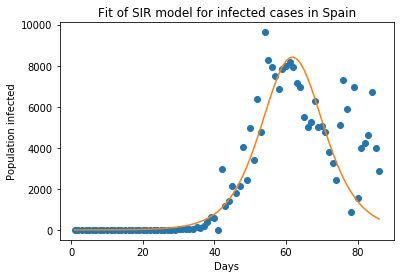

Optimal parameters: beta = 9.075666778422505  and gamma =  8.903973644907


In [17]:
plot_SIR_country('Spain',46750238)

We can see that the SIR model is not fitted very well with the real data. The above formula is the most basic representation of SIR model. There are many other versions which also consider other factors like demographic, or the intermediate states, which I cannot implement accurately and effectively. In the next part of the notebook, I will use log-linear function and logistics function to monitor the progress of this pandemic

## 4. Monitor early stage of pandemic with log-linear model

One thing we can observe when doing the EDA is the transmission rate of the disease is exponential-like at the early stage (for about 10 - 15 days starting from the outbreak). I will try plotting the number of cases for that period and try applying the log function to see if we can use log-linear model to observe the spreading of this virus

In [18]:
def plot_early_stage(country,type_case,start,end):   
    df_cases = get_cases_by_country(country)
    y1 = df_cases[type_case][start:end]
    x1 = range(0, len(y1))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    ax1.plot(x1, y1, 'bo--')
    ax1.set_title("{} {} cases between days {} and {}".format(country,type_case,start,end))
    ax1.set_xlabel("Days")
    ax1.set_ylabel("Cases")

    y2 = y1.apply(lambda x: np.log(x))
    x2 = range(0, len(y2))
    ax2.plot(x2, y2, 'bo--')
    ax2.set_title("{} log {} cases between days {} and {}".format(country,type_case,start,end))
    ax2.set_xlabel("Days")
    ax2.set_ylabel("Log cases")
    fig.show()

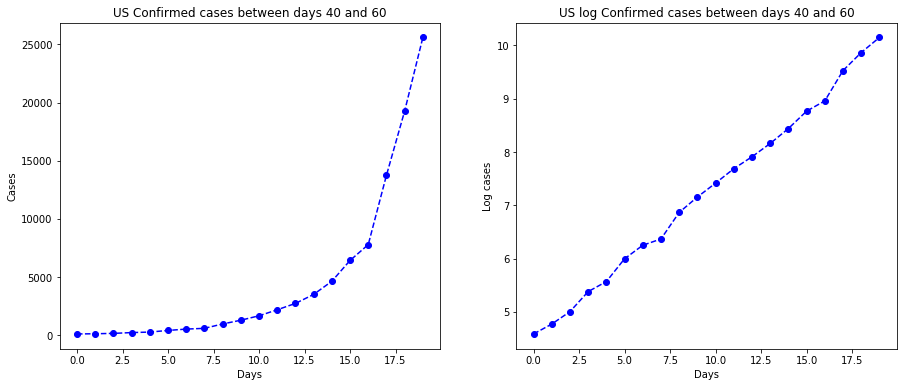

In [19]:
plot_early_stage('US','Confirmed',40,60)

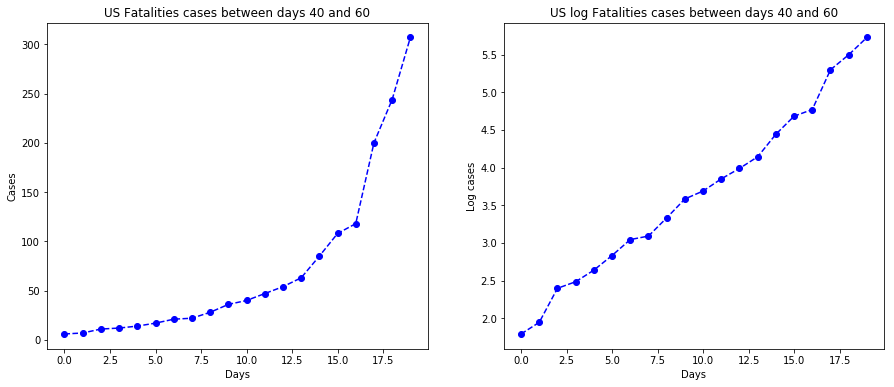

In [20]:
plot_early_stage('US','Fatalities',40,60)

The log-applied data seems to fit quite well for a linear function. So we can try fit a linear model to the number and see if it can give accurate forcast for the early stage of the outbreak. I will fit the linear model with a period of data and predict the number for the next 10 days, then compare with the actual data

In [21]:
def split_data(df, start, end):
    predict_length = 10
    y_train = df.iloc[start:end].to_numpy()
    x_train = np.arange(y_train.shape[0]).reshape(-1,1)
    x_test = np.arange(y_train.shape[0],y_train.shape[0]+predict_length).reshape(-1,1)
    y_test = df.iloc[end:end+predict_length].to_numpy()
    return x_train, y_train, x_test, y_test


def lin_reg(X_train, Y_train, X_test):
    regr = linear_model.LinearRegression()
    regr.fit(X_train, Y_train)
    y_pred = regr.predict(X_test)
    return regr, y_pred

In [22]:
def plot_log_linear_country(country, train_start, train_end):
    df = get_cases_by_country(country)
    df = df.astype('float64').apply(lambda x: np.log1p(x))
    X_train, Y_train, X_test, Y_test = split_data(df['Confirmed'], train_start, train_end)
    model, pred = lin_reg(X_train, Y_train, X_test)
    RMSE_confirmed = np.sqrt(np.mean((pred-Y_test)**2))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))    
    ax1.plot(np.concatenate((X_train,X_test),axis=None), np.expm1(np.concatenate((Y_train,pred),axis=None)))
    ax1.plot(np.concatenate((X_train,X_test),axis=None), np.expm1(np.concatenate((Y_train,Y_test),axis=None)))      
    ax1.legend(['Predicted cases', 'Actual cases'], loc='upper left')
    ax1.set_xlabel("Day count")
    ax1.set_ylabel("Confirmed Cases")
    
    X_train, Y_train, X_test, Y_test = split_data(df['Fatalities'], train_start, train_end)
    model, pred = lin_reg(X_train, Y_train, X_test)
    ax2.plot(np.concatenate((X_train,X_test),axis=None), np.expm1(np.concatenate((Y_train,pred),axis=None)))
    ax2.plot(np.concatenate((X_train,X_test),axis=None), np.expm1(np.concatenate((Y_train,Y_test),axis=None)))      
    ax2.legend(['Predicted cases', 'Actual cases'], loc='upper left')
    ax2.set_xlabel("Day count")
    ax2.set_ylabel("Fatal Cases")
    RMSE_fatal = np.sqrt(np.mean((pred-Y_test)**2))
    
    print("Root mean squared error for confirmed case: ", RMSE_confirmed)
    print("Root mean squared error for fatal case: ", RMSE_fatal)

    plt.show()    

Root mean squared error for confirmed case:  0.11262179191614262
Root mean squared error for fatal case:  0.2012122020962682


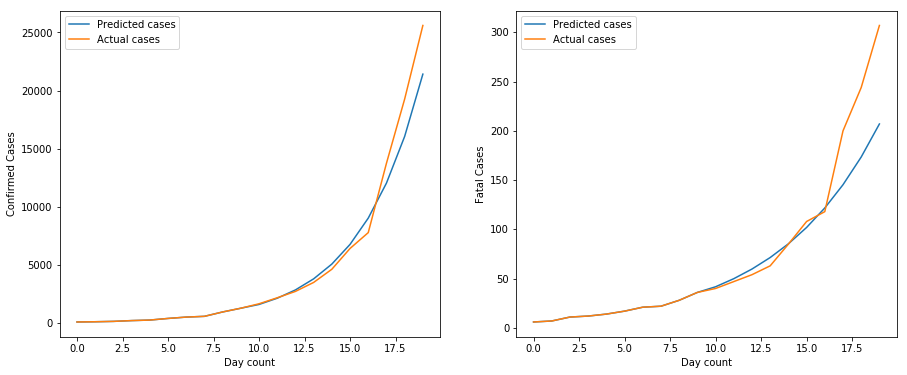

In [23]:
plot_log_linear_country('US',40,50)

Root mean squared error for confirmed case:  0.2575176595976714
Root mean squared error for fatal case:  0.5264137269163458


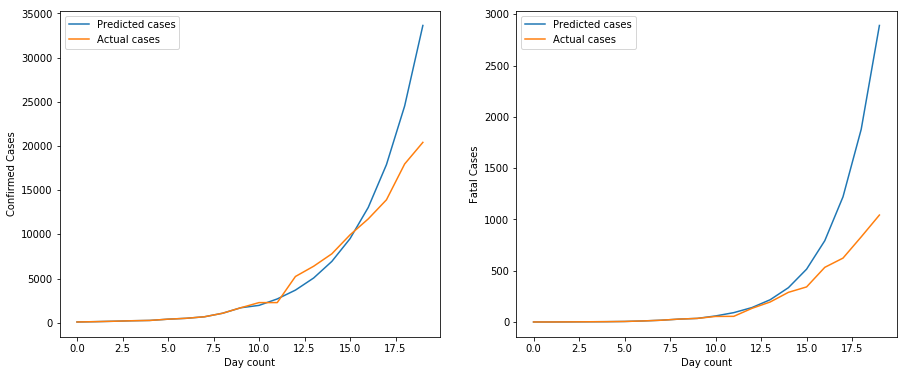

In [24]:
plot_log_linear_country('Spain', 39,49)

It can be seen that the log-linear model fit well only if we can specify a right data window that lie at exactly the early stage of the outbreak as for that period, the number of cases grow in an exponential form. After that perior, with strict policy like social distancing and lock down, the transmission rate will be lower, then the log-linear model is no longer accurate. We can conclude that this model is not very effective in forecasting the pandemic progress.

## 5. Use logistic function to monitor the transmission

In reality, the number of cases should look closer to a logistic function, with lower rate at the beginning and late stage of the outbreak, while higher at the middle when the disease starts to transmit. I will now define a logistic function to observe the progress of the COVID-19.

In [25]:
def logistic_function(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

def fit_logistic(X_train,Y_train,X_test):
    p0 = [0,1,1,0]
    (a_, b_, c_, d_), cov = optimize.curve_fit(logistic_function, X_train, Y_train, bounds=(0, [500000., 10., 1000., 1000., ]), p0=p0, maxfev=10**9)
    y_fit = logistic_function(X_test, a_, b_, c_, d_)
    
    return y_fit, (a_, b_, c_, d_), cov


def plot_logistic_country(country,start,end):
    df = get_cases_by_country(country)
    df = df['Confirmed']
    Y_train = df.iloc[start:end].to_numpy()
    X_train = np.arange(Y_train.shape[0])
    Y_test = df.to_numpy()
    X_test = np.arange(Y_test.shape[0])
    pred, (a_, b_, c_, d_), cov = fit_logistic(X_train, Y_train, X_test)
    RMSE = np.sqrt(np.mean((pred-Y_test)**2))
    print("Root mean squared error: ",RMSE)

    # Plot results
    plt.plot(X_test, pred)
    plt.plot(X_test, Y_test)
    plt.legend(['Predicted cases', 'Actual cases'], loc='upper left')
    plt.xlabel("Day count")
    plt.ylabel("Confirmed Cases")
    plt.show()    

I will use the first part of data to fit to a logistic function and spare the last 10 data for testing

Root mean squared error:  9303.46753335956


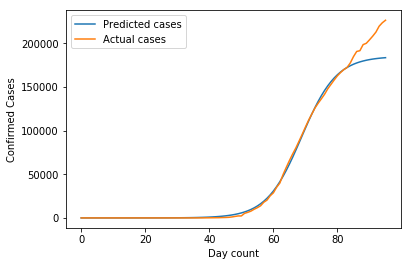

In [26]:
plot_logistic_country('Spain',0,-10)

Root mean squared error:  114805.13313209693


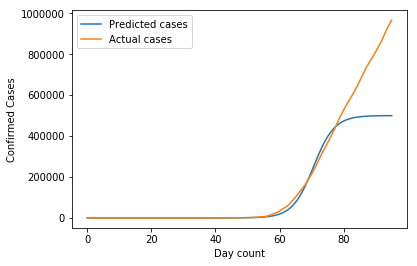

In [27]:
plot_logistic_country('US',0,-10)

Root mean squared error:  1887.6396457407595


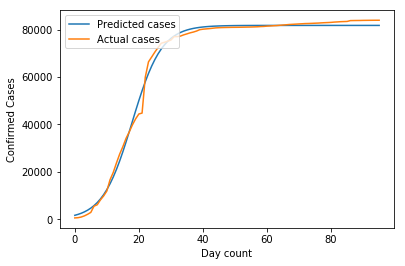

In [28]:
plot_logistic_country('China',0,-10)

Root mean squared error:  4.503991276607107


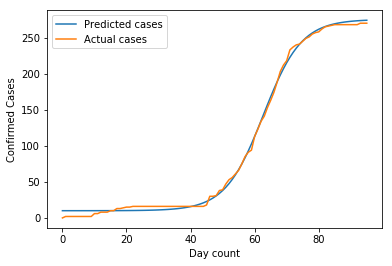

In [29]:
plot_logistic_country('Vietnam',0,-10)

It looks like the logistic function fits quite well for countries like China and Viet Nam, where the virus is said to have been suppressed and the number of confirmed cases stop raising. For countries like Spain or the US, the confirmed cases data is still increasing so the logistic function is not fitting well. 

## Conclusion

In this project, I have used 3 different method to monitor and forecast the number of confirmed and deceased cases of COVID-19. However, those models are the most simple and need manual effort to fine tune and select which part of the data to apply and cannot fit the data well enough in general

In order to improve the performance and flexibility of the forecasting model, we can try other methods, such as ARIMA (Autoregressive integrated moving average) or LSTM for time series prediction. We can also take into account other information: regions, mass social interaction, and lock down period in order to achieve more accurate result